In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1.
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 12, 6
mpl.rcParams['figure.dpi'] = 200

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

In [2]:
pred_dir='/Users/noah/Physics/Fermilab/Interference/EM_Responses/Isospin_Responses/'

In [3]:
exchange_files = ['C12_EM_2b_FG_q300.out','C12_EM_2b_FG_q400.out','C12_EM_2b_FG_q500.out','C12_EM_2b_FG_q700.out']
exchange_dir_files = ['C12_EM_2b_FG_q300_wdir.out','C12_EM_2b_FG_q400_wdir.out','C12_EM_2b_FG_q500_wdir.out','C12_EM_2b_FG_q700_wdir.out']

e_df = [pd.read_csv(pred_dir+f,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for f in exchange_files]
e_d_df = [pd.read_csv(pred_dir+f,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for f in exchange_dir_files]


for df in e_df:
    df.columns = ['w', 'rl', 'rt']
for df in e_d_df:
    df.columns = ['w', 'rl', 'rt']

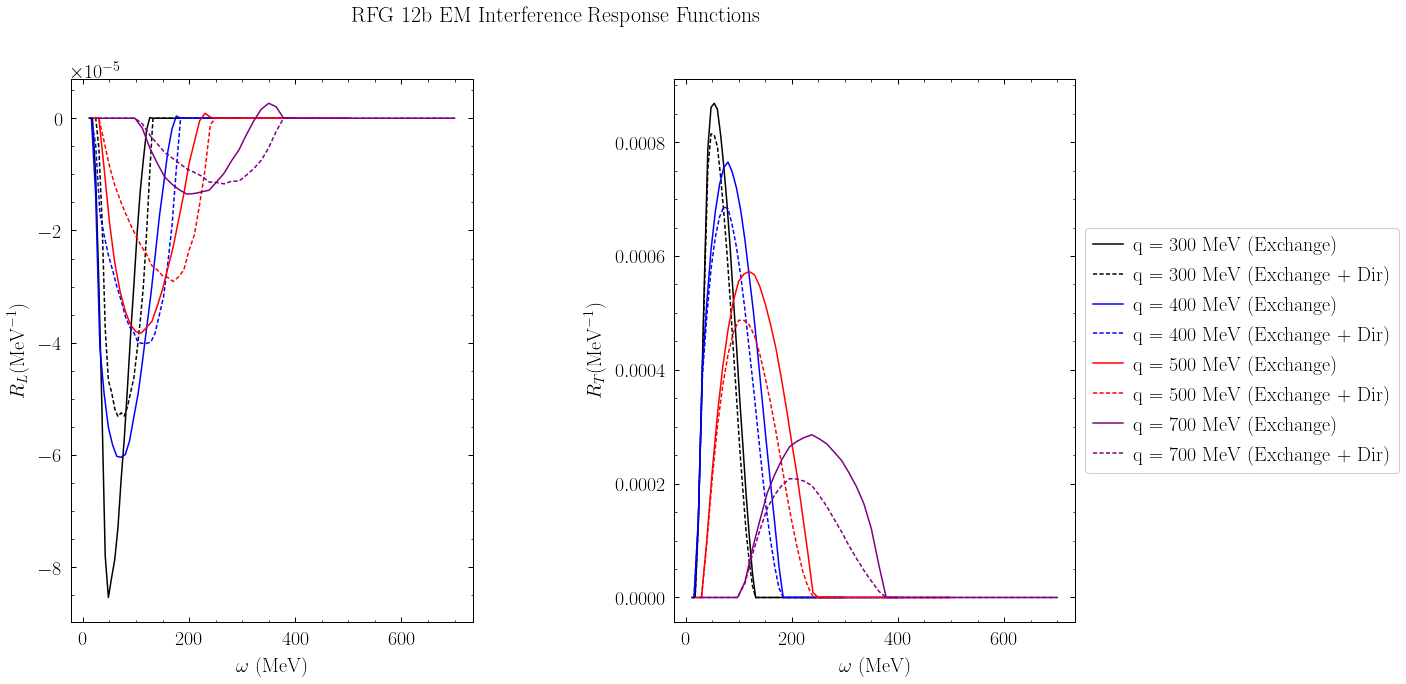

In [13]:
fig,ax = plt.subplots(1,2,figsize=(18,10))
plt.subplots_adjust(wspace=0.5)

fig.suptitle('RFG 12b EM Interference Response Functions',fontsize=22)

ax[0].plot(e_df[0]['w'], e_df[0]['rl'], label = 'Exchange',color='black',linestyle='solid')
ax[0].plot(e_d_df[0]['w'], e_d_df[0]['rl'], label = 'Exchange + Dir',color='black',linestyle='dashed')

ax[0].plot(e_df[1]['w'], e_df[1]['rl'], label = 'Exchange',color='blue',linestyle='solid')
ax[0].plot(e_d_df[1]['w'], e_d_df[1]['rl'], label = 'Exchange + Dir',color='blue',linestyle='dashed')

ax[0].plot(e_df[2]['w'], e_df[2]['rl'], label = 'Exchange',color='red',linestyle='solid')
ax[0].plot(e_d_df[2]['w'], e_d_df[2]['rl'], label = 'Exchange + Dir',color='red',linestyle='dashed')

ax[0].plot(e_df[3]['w'], e_df[3]['rl'], label = 'Exchange',color='purple',linestyle='solid')
ax[0].plot(e_d_df[3]['w'], e_d_df[3]['rl'], label = 'Exchange + Dir',color='purple',linestyle='dashed')

ax[1].plot(e_df[0]['w'], e_df[0]['rt'], label = 'q = 300 MeV (Exchange)',color='black',linestyle='solid')
ax[1].plot(e_d_df[0]['w'], e_d_df[0]['rt'], label = 'q = 300 MeV (Exchange + Dir)',color='black',linestyle='dashed')

ax[1].plot(e_df[1]['w'], e_df[1]['rt'], label = 'q = 400 MeV (Exchange)',color='blue',linestyle='solid')
ax[1].plot(e_d_df[1]['w'], e_d_df[1]['rt'], label = 'q = 400 MeV (Exchange + Dir)',color='blue',linestyle='dashed')

ax[1].plot(e_df[2]['w'], e_df[2]['rt'], label = 'q = 500 MeV (Exchange)',color='red',linestyle='solid')
ax[1].plot(e_d_df[2]['w'], e_d_df[2]['rt'], label = 'q = 500 MeV (Exchange + Dir)',color='red',linestyle='dashed')

ax[1].plot(e_df[3]['w'], e_df[3]['rt'], label = 'q = 700 MeV (Exchange)',color='purple',linestyle='solid')
ax[1].plot(e_d_df[3]['w'], e_d_df[3]['rt'], label = 'q = 700 MeV (Exchange + Dir)',color='purple',linestyle='dashed')

ax[0].set_xlabel(r'$\omega$ (MeV)')
ax[0].set_ylabel(r'$R_{L} (\rm{MeV}^{-1})$')
ax[1].set_xlabel(r'$\omega$ (MeV)')
ax[1].set_ylabel(r'$R_{T} (\rm{MeV}^{-1})$')

#ax[0].legend()
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
exchange_files = ['C12_EM_2b_QMC_q500_pp_nodir.out','C12_EM_2b_QMC_q500_pn_nodir.out','C12_EM_2b_QMC_q500_np_nodir.out','C12_EM_2b_QMC_q500_nn_nodir.out']
exchange_dir_files = ['C12_EM_2b_QMC_q500_pp.out','C12_EM_2b_QMC_q500_pn.out','C12_EM_2b_QMC_q500_np.out','C12_EM_2b_QMC_q500_nn.out']

ex_df = [pd.read_csv(pred_dir+f,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for f in exchange_files]
ex_dir_df = [pd.read_csv(pred_dir+f,sep="\s+|\t+|\s+\t+|\t+\s+", engine='python') for f in exchange_dir_files]

ex_df[0] = ex_df[0][49:]
ex_df[1] = ex_df[1][49:]
ex_df[2] = ex_df[2][49:]
ex_df[3] = ex_df[3][49:]
ex_dir_df[0] = ex_dir_df[0][49:]
ex_dir_df[1] = ex_dir_df[1][49:]
ex_dir_df[2] = ex_dir_df[2][49:]
ex_dir_df[3] = ex_dir_df[3][49:]

for df in ex_df:
    df.columns = ['w', 'rl', 'rt']
    #df=df[49:]
for df in ex_dir_df:
    df.columns = ['w', 'rl', 'rt']
    #df=df[49:]

(0.0, 400.0)

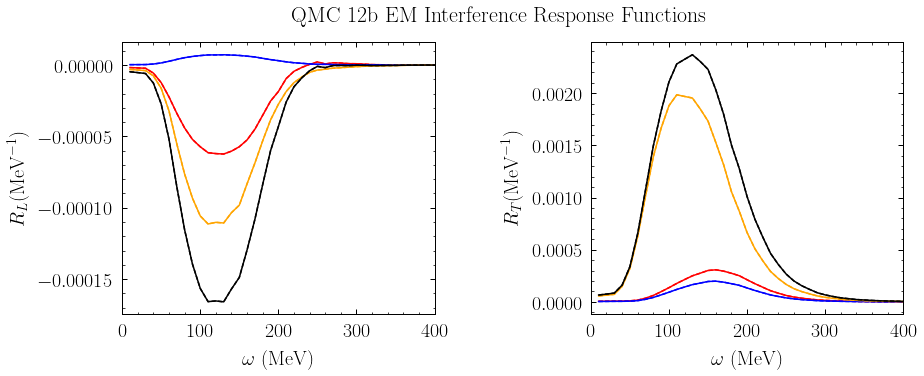

In [44]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.subplots_adjust(wspace=0.5)

fig.suptitle('QMC 12b EM Interference Response Functions',fontsize=22)
ax[0].plot(ex_df[0]['w'], ex_df[0]['rl'], label = 'Exchange pp',color='red',linestyle='solid')
ax[0].plot(ex_dir_df[0]['w'], ex_dir_df[0]['rl'], label = 'Exchange + Dir pp',color='red',linestyle='--')

ax[0].plot(ex_df[3]['w'], ex_df[3]['rl'], label = 'Exchange nn',color='blue',linestyle='solid')
ax[0].plot(ex_dir_df[3]['w'], ex_dir_df[3]['rl'], label = 'Exchange + Dir nn',color='blue',linestyle='--')

ax[0].plot(ex_df[2]['w'], ex_df[2]['rl'] + ex_df[1]['rl'], label = 'Exchange pn',color='orange',linestyle='solid')
ax[0].plot(ex_dir_df[2]['w'], ex_dir_df[2]['rl'] +  ex_dir_df[1]['rl'], label = 'Exchange + Dir pn',color='orange',linestyle='--')

ax[0].plot(ex_df[2]['w'], ex_df[2]['rl'] + ex_df[1]['rl'] + ex_df[0]['rl'] + ex_df[3]['rl'], label = 'Exchange total',color='black',linestyle='solid')
ax[0].plot(ex_dir_df[2]['w'], ex_dir_df[2]['rl'] +  ex_dir_df[1]['rl'] + ex_dir_df[0]['rl'] + ex_dir_df[3]['rl'], label = 'Exchange + Dir total',color='black',linestyle='--')
           
ax[1].plot(ex_df[0]['w'], ex_df[0]['rt'], label = 'Exchange pp',color='red',linestyle='solid')
ax[1].plot(ex_dir_df[0]['w'], ex_dir_df[0]['rt'], label = 'Exchange + Dir pp',color='red',linestyle='--')

ax[1].plot(ex_df[3]['w'], ex_df[3]['rt'], label = 'Exchange nn',color='blue',linestyle='solid')
ax[1].plot(ex_dir_df[3]['w'], ex_dir_df[3]['rt'], label = 'Exchange + Dir nn',color='blue',linestyle='--')

ax[1].plot(ex_df[2]['w'], ex_df[2]['rt'] + ex_df[1]['rt'], label = 'Exchange pn',color='orange',linestyle='solid')
ax[1].plot(ex_dir_df[2]['w'], ex_dir_df[2]['rt'] +  ex_dir_df[1]['rt'], label = 'Exchange + Dir pn',color='orange',linestyle='--')

ax[1].plot(ex_df[2]['w'], ex_df[2]['rt'] + ex_df[1]['rt'] + ex_df[0]['rt'] + ex_df[3]['rt'], label = 'Exchange total',color='black',linestyle='solid')
ax[1].plot(ex_dir_df[2]['w'], ex_dir_df[2]['rt'] +  ex_dir_df[1]['rt'] + ex_dir_df[0]['rt'] + ex_dir_df[3]['rt'], label = 'Exchange + Dir total',color='black',linestyle='--')

ax[0].set_xlabel(r'$\omega$ (MeV)')
ax[0].set_ylabel(r'$R_{L} (\rm{MeV}^{-1})$')
ax[1].set_xlabel(r'$\omega$ (MeV)')
ax[1].set_ylabel(r'$R_{T} (\rm{MeV}^{-1})$')

#ax[0].legend()
#ax[1].legend()

ax[0].set_xlim([0,400])
ax[1].set_xlim([0,400])

In [20]:
test = ex_dir_df[2].iloc[49:]

In [21]:
test

,w,rl,rt
49,10.0,6.134581e-07,2.195967e-05
50,20.0,6.979583e-07,2.477500e-05
51,30.0,7.874144e-07,2.779148e-05
52,40.0,1.353892e-06,5.789262e-05
53,50.0,2.721156e-06,1.259871e-04
54,60.0,5.291010e-06,2.467745e-04
55,70.0,9.113898e-06,3.973374e-04
56,80.0,1.308595e-05,5.434198e-04
57,90.0,1.669903e-05,6.470566e-04
58,100.0,1.977527e-05,7.274857e-04


In [7]:
test_df

,w,rl,rt
49,10.0,6.134581e-07,2.195967e-05
50,20.0,6.979583e-07,2.477500e-05
51,30.0,7.874144e-07,2.779148e-05
52,40.0,1.353892e-06,5.789262e-05
53,50.0,2.721156e-06,1.259871e-04
54,60.0,5.291010e-06,2.467745e-04
55,70.0,9.113898e-06,3.973374e-04
56,80.0,1.308595e-05,5.434198e-04
57,90.0,1.669903e-05,6.470566e-04
58,100.0,1.977527e-05,7.274857e-04


In [22]:
test_df

,w,rl,rt
49,10.0,6.134581e-07,2.195967e-05
50,20.0,6.979583e-07,2.477500e-05
51,30.0,7.874144e-07,2.779148e-05
52,40.0,1.353892e-06,5.789262e-05
53,50.0,2.721156e-06,1.259871e-04
54,60.0,5.291010e-06,2.467745e-04
55,70.0,9.113898e-06,3.973374e-04
56,80.0,1.308595e-05,5.434198e-04
57,90.0,1.669903e-05,6.470566e-04
58,100.0,1.977527e-05,7.274857e-04
